In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
import minihack
from minihack import RewardManager
from minihack import LevelGenerator
from nle import nethack
from utils import *
from AA_algorithms import *
import IPython.display as display

In [9]:
# Define a 10x10 room and populate it with
# different objects, monster and features

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""
lvl_gen = LevelGenerator(w=10, h=10)
lvl_gen.set_start_pos((0,0))
lvl_gen.add_object("apple", "%", place=(2,5))
lvl_gen.add_stair_down(place=(7,7))


MOVE_ACTIONS = tuple(nethack.CompassDirection)
ACTIONS = MOVE_ACTIONS + (nethack.Command.EAT,nethack.Command.PICKUP) + tuple(range(ord('a'), ord('z') + 1))

# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple
reward_manager.add_eat_event("apple")

env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file=lvl_gen.get_des(),
    reward_manager=reward_manager,
    observation_keys=("glyphs", "chars", "colors", 'screen_descriptions','inv_strs','blstats','message','pixel'),
)
obs, info = env.reset() # each reset generates a new environment instance
env.render()


Watch out!  Bad things can happen on Friday the 13th.                           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  @.........                                    
                                  ..........                                    
                                  ..........                                    
                                  ..........                                    
                           

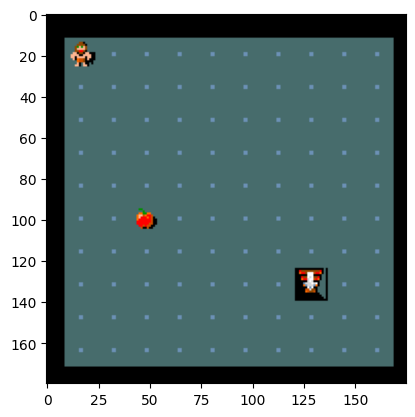

In [10]:
plt.imshow(obs['pixel'][100:280, 535:710])

In [11]:
import numpy as np
from utils import get_player_location, get_target_location

directions = ["UP", "RIGHT", "DOWN", "LEFT"]

state, _ = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

char_map = np.vectorize(chr)(game_map)
apple_positions = np.where(char_map == '%')
# zip into a list of int tuples (x, y)
apple_positions = list(zip(apple_positions[0], apple_positions[1]))
print("Apple positions:", apple_positions)

Apple positions: [(np.int64(12), np.int64(36))]


In [12]:
from utils import actions_from_path, manhattan_distance

path = a_star_apple(game_map, start, target, manhattan_distance)
actions = actions_from_path(start, path[1:])
print("Actions to take:", list((map(lambda x: directions[x], actions))))
# check how much apple is collected in the path
apple_collected = 0
for (x, y) in path:
    if chr(game_map[x, y]) == '%':
        apple_collected += 1

print("apple collected in the path:", apple_collected)
print_path_on_map(game_map, path)

Actions to take: ['RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']
apple collected in the path: 1
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                  @*........                                   
                                  .*........                                   
                                  .*........                                   
                                

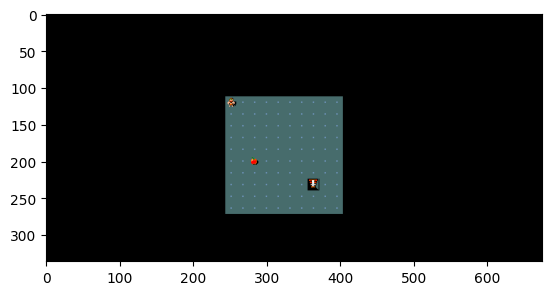

Action taken: RIGHT


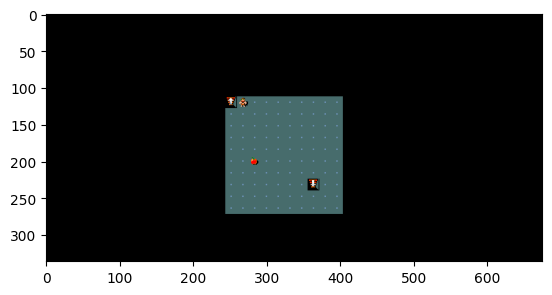

Action taken: DOWN


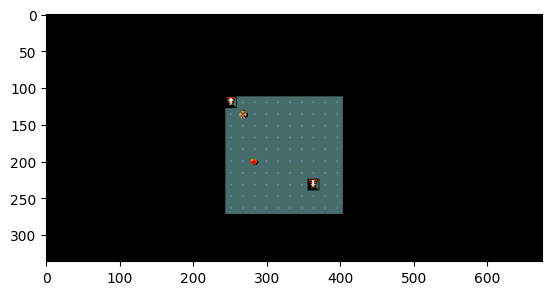

Action taken: DOWN


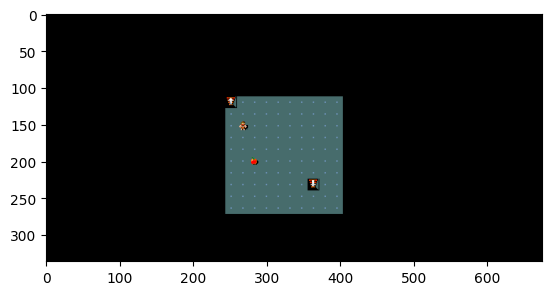

Action taken: DOWN


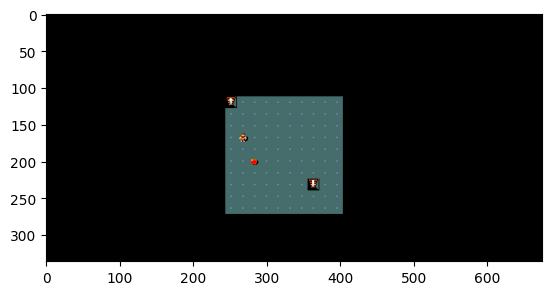

Action taken: DOWN


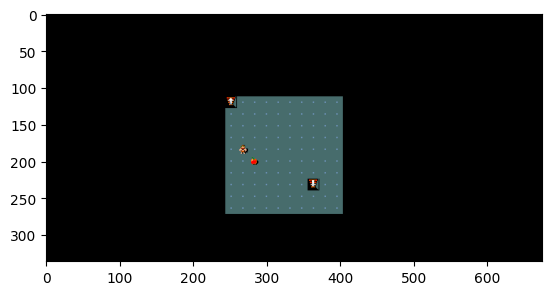

Action taken: RIGHT


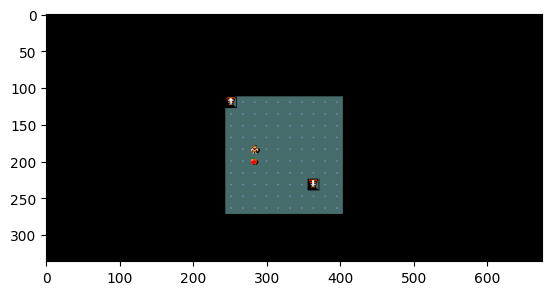

Action taken: DOWN


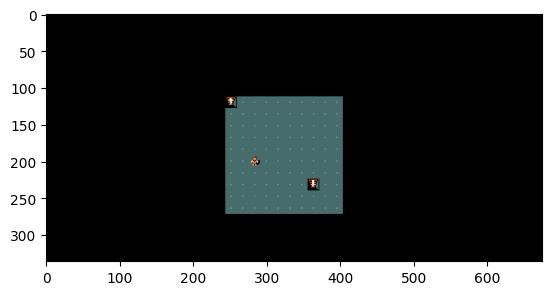

Action taken: RIGHT


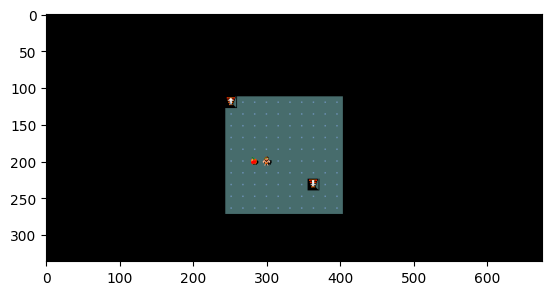

Action taken: DOWN


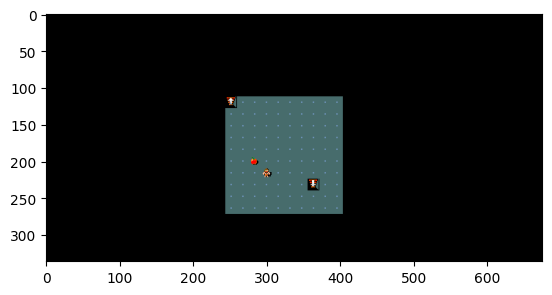

Action taken: RIGHT


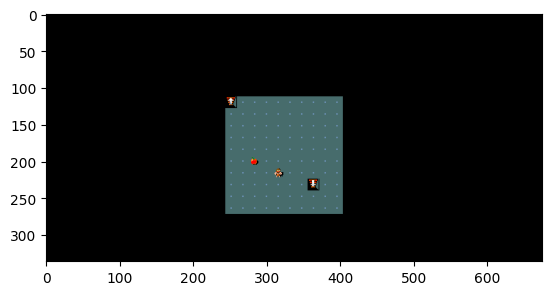

Action taken: RIGHT


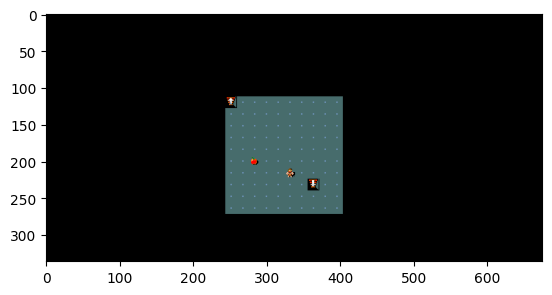

Action taken: RIGHT


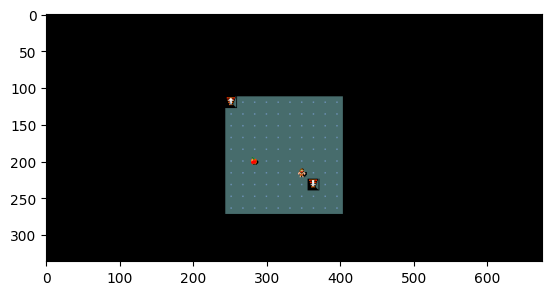

Action taken: RIGHT
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}


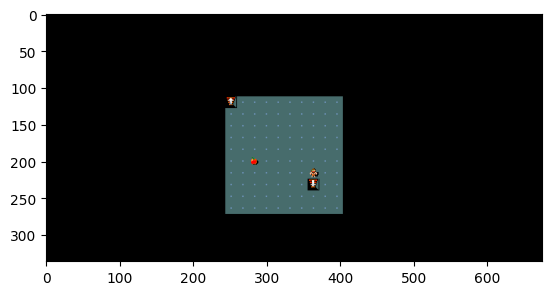

In [13]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, done, _, dic = env.step(action)
    if not done:
        display.display(plt.gcf())
        #display.clear_output(wait=)
        #time.sleep(0.5)
        image.set_data(s['pixel'][:, 300:975])
        print("Action taken:", directions[action])
    else:
        print(f"Episode finished:", dic)
        break
